In [6]:
!pip install --upgrade 'numpy<2.0' 'pandas>=2.2' matplotlib scikit-learn

  Using cached scikit_learn-1.5.2-cp310-cp310-macosx_12_0_arm64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.5.2-cp310-cp310-macosx_12_0_arm64.whl (11.0 MB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)


In [360]:
import pandas as pd
import numpy as np

In [361]:
df = pd.read_csv('house_price_data/train.csv')
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [362]:
pd.Series(list('abca'))

0    a
1    b
2    c
3    a
dtype: object

In [363]:
# filter df with column Saletype='New'
df[df['SaleType'] == 'New']

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
11,12,60,RL,85.0,11924,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,345000
13,14,20,RL,91.0,10652,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,New,Partial,279500
20,21,60,RL,101.0,14215,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2006,New,Partial,325300
48,49,190,RM,33.0,4456,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,113000
58,59,60,RL,66.0,13682,Pave,NaN,IR2,HLS,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,438780
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1375,1376,20,RL,89.0,10991,Pave,NaN,IR1,HLS,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,239000
1394,1395,120,RL,53.0,4045,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2006,New,Partial,246578
1402,1403,20,RL,64.0,6762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,New,Partial,193879
1437,1438,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,11,2008,New,Partial,394617


In [371]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
import datetime

# Prepare the data
df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']
X = df.drop(['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

# Handle categorical variables
X = pd.get_dummies(X)

X.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,False,False,False,True,False,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,False,False,False,True,False,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,False,False,False,True,False,False,False,False,True,False


In [372]:
y.head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [366]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [367]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

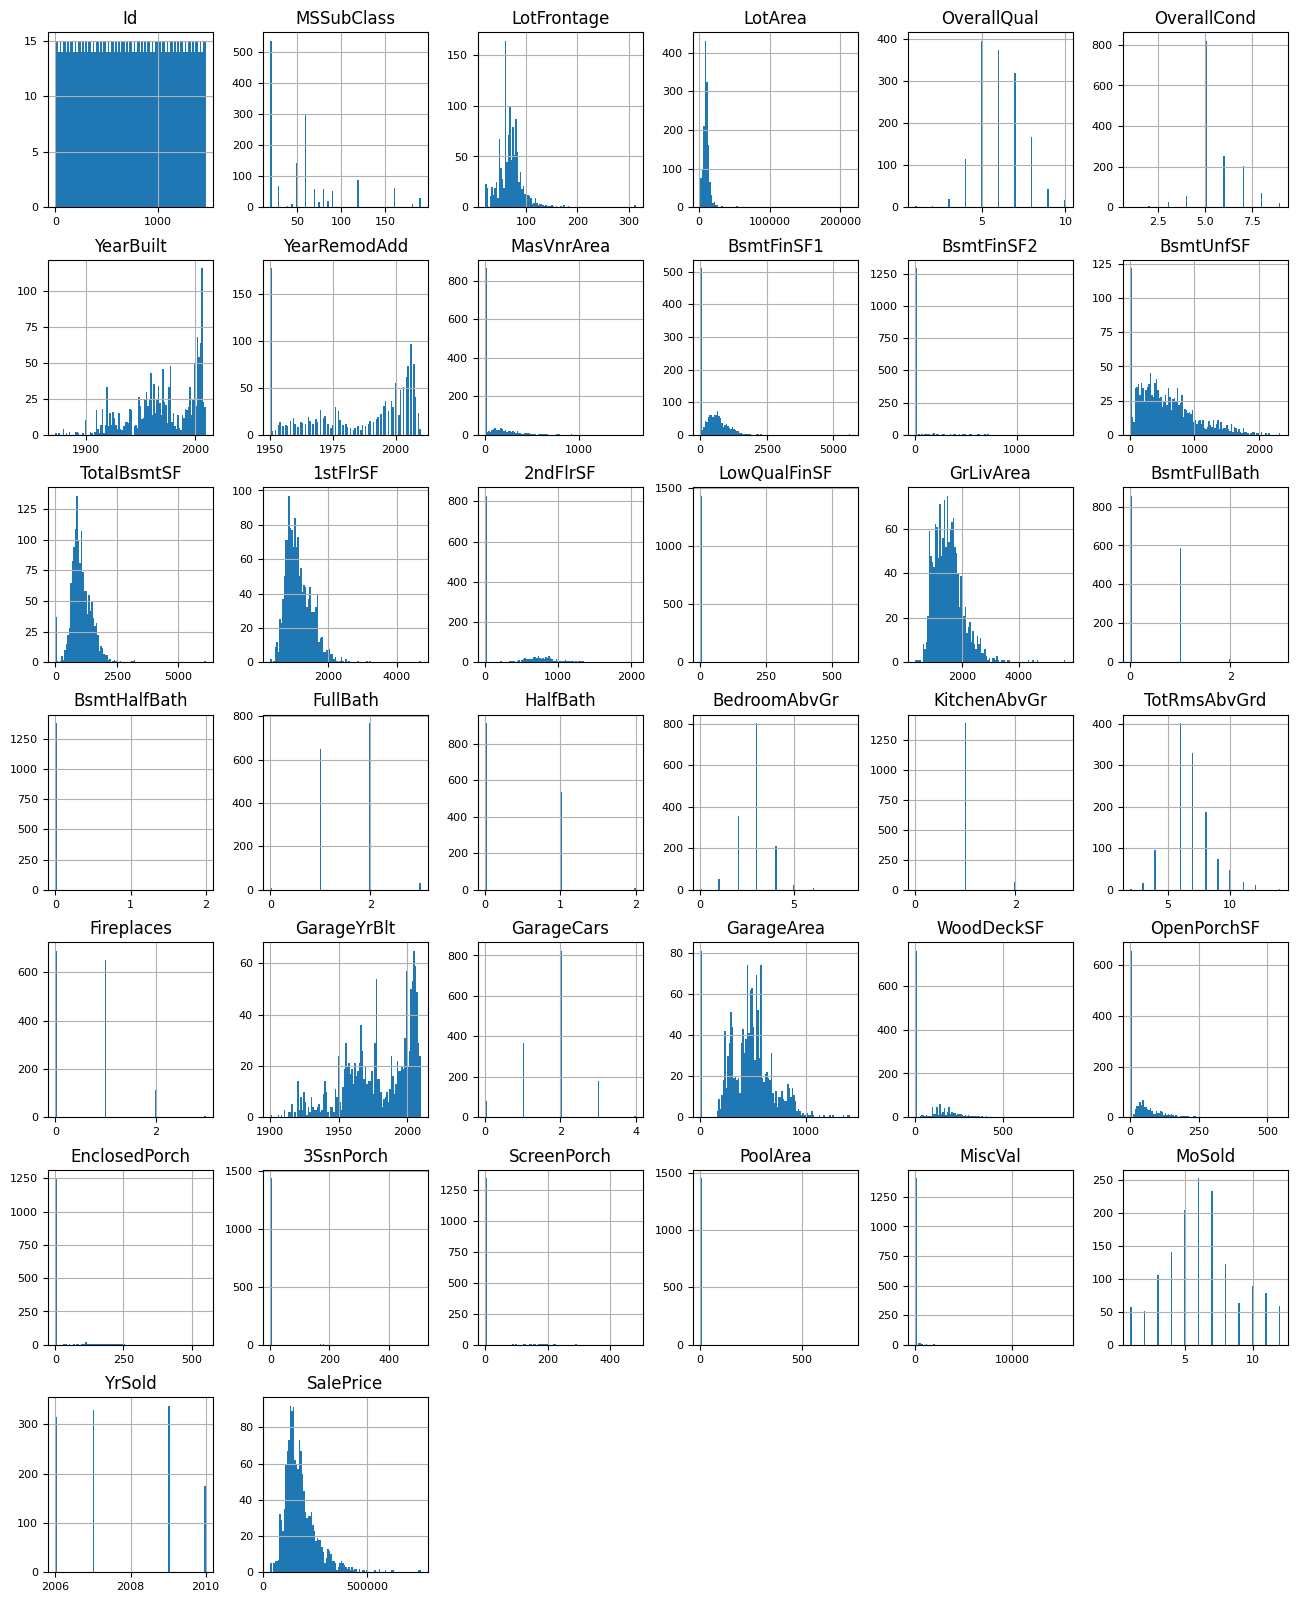

In [373]:
# explain
df_num.hist(figsize=(16,20), bins=100, xlabelsize=8, ylabelsize=8)

In [374]:

# Split the data
# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [375]:
from sklearn.metrics import roc_auc_score

# Set XGBoost parameters
params = {
    'max_depth': 3,
    'eta': 0.1,
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse'
}

# Train the model
num_rounds = 100
model = xgb.train(params, dtrain, num_rounds)

# Make predictions
y_pred = model.predict(dtest)

# Evaluate the model
# compute auc
# auc = roc_auc_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"RMSE: {rmse} AUC: {auc}")

# Feature importance
importance = model.get_score(importance_type='weight')
importance = sorted(importance.items(), key=lambda x: x[1], reverse=True)
print("Top 10 important features:")
for feature, score in importance[:10]:
    print(f"{feature}: {score}")

Top 10 important features:
GrLivArea: 68.0
OverallQual: 44.0
TotalBsmtSF: 39.0
BsmtFinSF1: 37.0
LotArea: 34.0
OverallCond: 32.0
YearBuilt: 28.0
2ndFlrSF: 23.0
GarageYrBlt: 22.0
YearRemodAdd: 17.0


In [376]:
test_csv = pd.read_csv('house_price_data/test.csv')
test_csv.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [377]:
ids = test_csv['Id']
ids.head(3)

0    1461
1    1462
2    1463
Name: Id, dtype: int64

## use xgboost

In [378]:
# Preprocess the test data
X_test = test_csv.drop(['Id'], axis=1)  # Remove 'Id' column
X_test = pd.get_dummies(X_test)  # Handle categorical variables

missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0

X_test = X_test[X_train.columns]
X_test = xgb.DMatrix(X_test)

y_pred = model.predict(X_test)

result = pd.DataFrame({"Id":ids, "SalePrice":y_pred})
result.to_csv("house_price_predictions.csv", index=False)
print("Predictions saved to house_price_predictions.csv")

Predictions saved to house_price_predictions.csv


## use pytorch

In [21]:
!pip install torch torchvision -y

  Using cached torch-2.4.1-cp310-none-macosx_11_0_arm64.whl.metadata (26 kB)
  Using cached torchvision-0.19.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (6.0 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.3-py3-none-any.whl.metadata (12 kB)
  Using cached networkx-3.4.1-py3-none-any.whl.metadata (6.3 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached fsspec-2024.9.0-py3-none-any.whl.metadata (11 kB)
  Using cached MarkupSafe-3.0.1-cp310-cp310-macosx_11_0_arm64.whl.metadata (4.0 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.4.1-cp310-none-macosx_11_0_arm64.whl (62.1 MB)
Using cached torchvision-0.19.1-cp310-cp310-macosx_11_0_arm64.whl (1.7 MB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached fsspec-2024.9.0-py3-none-any.whl (179 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Using cached networkx-3.4.1-py3-none-any.whl (1.7 MB)
Using cache

In [22]:
from torch.utils.data import Dataset, DataLoader

In [23]:
train_data = pd.read_csv('house_price_data/train.csv')
train_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [24]:
set(train_data.dtypes)

{dtype('int64'), dtype('float64'), dtype('O')}

In [25]:
train_data = pd.get_dummies(train_data)
train_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,False,False,False,True,False,False,False,False,True,False
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,False,False,False,True,False,False,False,False,True,False
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,False,False,False,True,False,False,False,False,True,False


In [26]:
test_data = pd.read_csv('house_price_data/test.csv')
test_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal


In [27]:
test_data = pd.get_dummies(test_data)
test_data.head(3)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,False,False,False,True,False,False,False,False,True,False
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,False,False,False,True,False,False,False,False,True,False
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,False,False,False,True,False,False,False,False,True,False


In [28]:
train_data['SalePrice'].head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [29]:
# Align train and test data to have the same columns
train_data, test_data = train_data.align(test_data, join='outer', axis=1)

# Fill NaN values in train_data and test_data
train_data = train_data.fillna(0)
test_data = test_data.fillna(0)

In [30]:
test_data['SalePrice'].head(3)

0    0.0
1    0.0
2    0.0
Name: SalePrice, dtype: float64

In [31]:
train_data['SalePrice'].head(3)

0    208500
1    181500
2    223500
Name: SalePrice, dtype: int64

In [83]:
X = train_data.drop(['SalePrice'], axis=1)
X

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley_Grvl,Alley_Pave,BedroomAbvGr,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,...,Street_Grvl,Street_Pave,TotRmsAbvGrd,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,False,False,3,True,False,False,False,...,False,True,8,856,True,False,0,2003,2003,2008
1,1262,0,0,False,False,3,True,False,False,False,...,False,True,6,1262,True,False,298,1976,1976,2007
2,920,866,0,False,False,3,True,False,False,False,...,False,True,6,920,True,False,0,2001,2002,2008
3,961,756,0,False,False,3,True,False,False,False,...,False,True,7,756,True,False,0,1915,1970,2006
4,1145,1053,0,False,False,4,True,False,False,False,...,False,True,9,1145,True,False,192,2000,2000,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694,0,False,False,3,True,False,False,False,...,False,True,7,953,True,False,0,1999,2000,2007
1456,2073,0,0,False,False,3,True,False,False,False,...,False,True,7,1542,True,False,349,1978,1988,2010
1457,1188,1152,0,False,False,4,True,False,False,False,...,False,True,9,1152,True,False,0,1941,2006,2010
1458,1078,0,0,False,False,2,True,False,False,False,...,False,True,5,1078,True,False,366,1950,1996,2010


In [179]:
y = train_data['SalePrice'].values
y = y.reshape(-1, 1)
print(y.shape)
y


(1460, 1)


array([[208500],
       [181500],
       [223500],
       ...,
       [266500],
       [142125],
       [147500]])

In [115]:
X.shape

(1460, 288)

In [116]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)
X = np.reshape(X, (1460, 288))
X.shape

(1460, 288)

In [180]:
y_scaler = StandardScaler()
y_scaled = y_scaler.fit_transform(y)
y_scaled

array([[ 0.34727322],
       [ 0.00728832],
       [ 0.53615372],
       ...,
       [ 1.07761115],
       [-0.48852299],
       [-0.42084081]])

In [181]:


X_train, X_val, y_train, y_val = train_test_split(
    X, y_scaled, test_size=0.2, random_state=42
)
y_val.shape

(292, 1)

In [182]:
import torch

torch.tensor(y_train, dtype=torch.float32)

tensor([[-0.4523],
        [-0.0368],
        [-1.2078],
        ...,
        [-0.8301],
        [ 0.1137],
        [-0.0872]])

In [183]:
import torch

class HousePriceDataset(Dataset):
    def __init__(self, X, y):
        self.x_train = torch.tensor(X, dtype=torch.float32)
        self.y_train = torch.tensor(y, dtype=torch.float32)
    def __len__(self):
        return len(self.x_train)
    def __getitem__(self, idx):
        return self.x_train[idx], self.y_train[idx]


In [107]:
torch.tensor(X_val, dtype=torch.float32)
# torch.tensor(y_val, dtype=torch.float32)

tensor([[-0.2449, -0.7952, -0.1163,  ..., -0.2738,  0.8787, -1.3677],
        [ 0.8730,  1.7760, -0.1163,  ...,  0.7529,  0.4910,  1.6452],
        [-0.3484, -0.7952, -0.1163,  ..., -1.4662, -1.6894,  1.6452],
        ...,
        [-1.1246,  0.8731, -0.1163,  ...,  1.1172,  0.9756,  0.1388],
        [-1.0548,  0.9350, -0.1163,  ..., -1.0356, -1.6894,  0.8920],
        [-0.7727, -0.7952, -0.1163,  ..., -0.0420, -0.7203,  0.8920]])

In [184]:
# create dataset
train_dataset = HousePriceDataset(X_train, y_train)
val_dataset = HousePriceDataset(X_val, y_val)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

In [185]:
type(pd.DataFrame([1,2,3]).values)

numpy.ndarray

In [186]:
import torch.nn as nn
import torch.nn.functional as F


class HousePriceModel(nn.Module):

    def __init__(self, input_size:int) -> None:
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 8)
        self.fc5 = nn.Linear(8, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x) # output without activation
        return x
    

In [187]:
input_size = x_train.shape[1]
x_train.shape

(1460, 288)

In [188]:
model = HousePriceModel(input_size)

In [189]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [193]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), targets)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    val_loss = 0.0
    model.eval()
    with torch.no_grad():
        for inputs, targets in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), targets)
            val_loss += loss.item()

    print(f'Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss/len(train_loader)}, Val Loss: {val_loss/len(val_loader)}')

Epoch 1/50, Train Loss: 0.943828102704641, Val Loss: 1.1620299845933915
Epoch 2/50, Train Loss: 0.9392541614738671, Val Loss: 1.1617233276367187
Epoch 3/50, Train Loss: 0.9436094833386911, Val Loss: 1.1617801427841186
Epoch 4/50, Train Loss: 0.9427646535473901, Val Loss: 1.1619473218917846
Epoch 5/50, Train Loss: 0.943672089963346, Val Loss: 1.162055316567421
Epoch 6/50, Train Loss: 0.9380755472827602, Val Loss: 1.1622134476900101
Epoch 7/50, Train Loss: 0.948219060092359, Val Loss: 1.1621520459651946
Epoch 8/50, Train Loss: 0.9462717481561609, Val Loss: 1.161905938386917
Epoch 9/50, Train Loss: 0.9431886817957904, Val Loss: 1.1620368182659149
Epoch 10/50, Train Loss: 0.9429695557903599, Val Loss: 1.161905011534691
Epoch 11/50, Train Loss: 0.9398124475736875, Val Loss: 1.1624688446521758
Epoch 12/50, Train Loss: 0.9390965055774998, Val Loss: 1.1622315883636474
Epoch 13/50, Train Loss: 0.9810381725027755, Val Loss: 1.161982637643814
Epoch 14/50, Train Loss: 0.9500437539976996, Val Loss:

In [194]:
test_x = scaler.fit_transform(test_data.drop(['SalePrice'],axis=1).values)
test_x = torch.tensor(test_x, dtype=torch.float32)
test_x

tensor([[-0.6546, -0.7753, -0.0888,  ..., -0.3409, -1.0729,  1.7139],
        [ 0.4333, -0.7753, -0.0888,  ..., -0.4397, -1.2149,  1.7139],
        [-0.5742,  0.8919, -0.0888,  ...,  0.8441,  0.6787,  1.7139],
        ...,
        [ 0.1695, -0.7753, -0.0888,  ..., -0.3739,  0.5841, -1.3600],
        [-0.4686, -0.7753, -0.0888,  ...,  0.6795,  0.3947, -1.3600],
        [-0.4033,  1.6126, -0.0888,  ...,  0.7124,  0.4894, -1.3600]])

In [202]:
with torch.no_grad():
    test_y = model(test_x)
# tensor to numpy array
sale_price = test_y.detach().numpy()
sale_price = y_scaler.inverse_transform(sale_price)
print(sale_price.shape)
sale_price = sale_price.squeeze()
sale_price

(1459, 1)


array([179838.42, 181554.83, 182119.02, ..., 181724.  , 179769.03,
       181663.03], dtype=float32)

In [203]:
id = test_data['Id']
id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [204]:
result = pd.DataFrame({"Id": id,"SalePrice":sale_price})
result.to_csv('house_price_predictions.csv', index=False)

## use community solution

In [326]:
df = pd.read_csv('house_price_data/train.csv', usecols=["Id", "SalePrice", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500
1,2,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500
2,3,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500


In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1201 entries, 0 to 1459
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MSSubClass   1201 non-null   int64  
 1   MSZoning     1201 non-null   object 
 2   LotFrontage  1201 non-null   float64
 3   LotArea      1201 non-null   int64  
 4   Street       1201 non-null   object 
 5   LotShape     1201 non-null   object 
 6   YearBuilt    1201 non-null   int64  
 7   1stFlrSF     1201 non-null   int64  
 8   2ndFlrSF     1201 non-null   int64  
 9   SalePrice    1201 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 103.2+ KB


In [208]:
for i in df.columns:
    print(f'Column name {i} and unique values are {len(df[i].unique())}')

Column name MSSubClass and unique values are 15
Column name MSZoning and unique values are 5
Column name LotFrontage and unique values are 110
Column name LotArea and unique values are 869
Column name Street and unique values are 2
Column name LotShape and unique values are 4
Column name YearBuilt and unique values are 112
Column name 1stFlrSF and unique values are 678
Column name 2ndFlrSF and unique values are 368
Column name SalePrice and unique values are 597


In [209]:
import datetime
datetime.datetime.now().year

2024

In [211]:
df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,2003,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1976,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,2001,920,866,223500,23


In [ ]:
df.drop(["YearBuilt"],axis=1, inplace=True)

In [214]:
df.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,60,RL,65.0,8450,Pave,Reg,856,854,208500,21
1,20,RL,80.0,9600,Pave,Reg,1262,0,181500,48
2,60,RL,68.0,11250,Pave,IR1,920,866,223500,23


In [221]:
cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
out_features = ["SalePrice"]

In [222]:
from sklearn.preprocessing import LabelEncoder
lbl_encoders = {}
lbl_encoders['MSSubClass'] = LabelEncoder()
lbl_encoders['MSSubClass'].fit_transform(df['MSSubClass'])


array([5, 0, 5, ..., 6, 0, 0])

In [223]:
lbl_encoders

{'MSSubClass': LabelEncoder()}

In [230]:
# cat_features=["MSSubClass", "MSZoning", "Street", "LotShape"]
for f in cat_features:
    lbl_encoders[f] = LabelEncoder()
    df[f] = lbl_encoders[f].fit_transform(df[f])
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,SalePrice,Total Years
0,5,3,36,279,1,3,123,212,208500,21
1,0,3,51,422,1,3,401,0,181500,48
2,5,3,39,595,1,0,166,219,223500,23
3,6,3,31,414,1,0,195,163,140000,109
4,5,3,55,768,1,0,326,287,250000,24
...,...,...,...,...,...,...,...,...,...,...
1455,5,3,33,225,1,3,188,132,175000,25
1456,0,3,56,722,1,3,656,0,210000,46
1457,6,3,37,355,1,3,355,316,266500,83
1458,0,3,39,428,1,3,279,0,142125,74


In [232]:
cate_fe_array = np.stack([df['MSSubClass'],df['MSZoning'],df['Street'],df['LotShape']],axis=1)
cate_fe_array.shape

(1201, 4)

In [234]:
cate_fe_tensor = torch.tensor(cate_fe_array, dtype=torch.int32)
cate_fe_tensor

tensor([[5, 3, 1, 3],
        [0, 3, 1, 3],
        [5, 3, 1, 0],
        ...,
        [6, 3, 1, 3],
        [0, 3, 1, 3],
        [0, 3, 1, 3]], dtype=torch.int32)

In [235]:
cont_features = ['LotFrontage','LotArea','1stFlrSF','2ndFlrSF','Total Years']
cont_features

['LotFrontage', 'LotArea', '1stFlrSF', '2ndFlrSF', 'Total Years']

In [236]:
cont_fe_tensor = torch.tensor(np.stack([df[fe] for fe in cont_features], axis=1), dtype=torch.float32)
cont_fe_tensor

tensor([[ 36., 279., 123., 212.,  21.],
        [ 51., 422., 401.,   0.,  48.],
        [ 39., 595., 166., 219.,  23.],
        ...,
        [ 37., 355., 355., 316.,  83.],
        [ 39., 428., 279.,   0.,  74.],
        [ 46., 451., 397.,   0.,  59.]])

In [238]:
cont_fe_tensor.dtype

torch.float32

In [240]:
y = torch.tensor(df['SalePrice'].values, dtype=torch.float32).reshape(-1, 1)
y.shape

torch.Size([1201, 1])

In [241]:
len(df['MSSubClass'].unique())

15

In [242]:
cat_dims = [len(df[f].unique()) for f in cat_features]
cat_dims

[15, 5, 2, 4]

In [243]:
embedding_dim = [(x, min(50, (x+1)//2)) for x in cat_dims]
embedding_dim

[(15, 8), (5, 3), (2, 1), (4, 2)]

In [244]:
import torch.nn as nn
import torch.nn.functional as F

embed_repr = nn.ModuleList(
    [nn.Embedding(in_dim, out_dim) for in_dim, out_dim in embedding_dim]
)
embed_repr

ModuleList(
  (0): Embedding(15, 8)
  (1): Embedding(5, 3)
  (2): Embedding(2, 1)
  (3): Embedding(4, 2)
)

In [260]:
class FeedForwardModel(nn.Module):
    def __init__(self, embedding_dim, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_dim])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)

        layerList = []
        n_emb = sum((out for inp, out in embedding_dim))
        n_in = n_emb + n_cont

        for i in layers:
            layerList.append(nn.Linear(n_in, i))
            layerList.append(nn.ReLU(inplace=True))
            layerList.append(nn.BatchNorm1d(i))
            layerList.append(nn.Dropout(p))
            n_in = i
        layerList.append(nn.Linear(n_in, out_sz))

        self.layers = nn.Sequential(*layerList)

    def forward(self, x, x_cont):
        embeddings = []
        for i, e in enumerate(self.embeds):
            embeddings.append(e(x[:, i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [261]:
len(cont_features)

5

In [301]:
torch.manual_seed(100)
model = FeedForwardModel(embedding_dim, len(cont_features), 1, [100, 50], p=0.4)
model

FeedForwardModel(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [302]:
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [264]:
df.shape

(1201, 10)

In [265]:
cont_fe_tensor.shape

torch.Size([1201, 5])

In [266]:
cate_fe_tensor.shape

torch.Size([1201, 4])

In [303]:
batch_size=1200
test_size=int(batch_size*0.15)
train_categorical=cate_fe_tensor[:batch_size-test_size]
test_categorical=cate_fe_tensor[batch_size-test_size:batch_size]
train_cont=cont_fe_tensor[:batch_size-test_size]
test_cont=cont_fe_tensor[batch_size-test_size:batch_size]
y_train=y[:batch_size-test_size]
y_test=y[batch_size-test_size:batch_size]

In [304]:
len(train_categorical),len(test_categorical),len(train_cont),len(test_cont),len(y_train),len(y_test)

(1020, 180, 1020, 180, 1020, 180)

In [305]:
epochs = 50000
final_losses = []
final_val_losses = []
for i in range(epochs):
    y_pred = model(train_categorical, train_cont)
    loss = torch.sqrt(loss_function(y_pred, y_train))
    final_losses.append(loss.item())

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.no_grad():
        y_test_pred = model(test_categorical, test_cont)
        val_loss = torch.sqrt(loss_function(y_test_pred, y_test))
        final_val_losses.append(val_loss.item())

    if i % 10 == 0:
        print(f"Epoch {i} train loss {loss.item()} val loss {val_loss.item()}")

Epoch 0 train loss 200496.765625 val loss 190993.390625
Epoch 10 train loss 200495.28125 val loss 190991.796875
Epoch 20 train loss 200493.109375 val loss 190989.5
Epoch 30 train loss 200489.046875 val loss 190985.171875
Epoch 40 train loss 200481.46875 val loss 190977.140625
Epoch 50 train loss 200467.96875 val loss 190962.859375
Epoch 60 train loss 200444.953125 val loss 190938.609375
Epoch 70 train loss 200407.484375 val loss 190899.3125
Epoch 80 train loss 200349.140625 val loss 190838.328125
Epoch 90 train loss 200261.859375 val loss 190747.265625
Epoch 100 train loss 200135.671875 val loss 190615.96875
Epoch 110 train loss 199958.34375 val loss 190431.84375
Epoch 120 train loss 199714.984375 val loss 190179.546875
Epoch 130 train loss 199387.65625 val loss 189840.8125
Epoch 140 train loss 198955.25 val loss 189393.96875
Epoch 150 train loss 198393.046875 val loss 188813.78125
Epoch 160 train loss 197672.59375 val loss 188071.03125
Epoch 170 train loss 196760.609375 val loss 18713

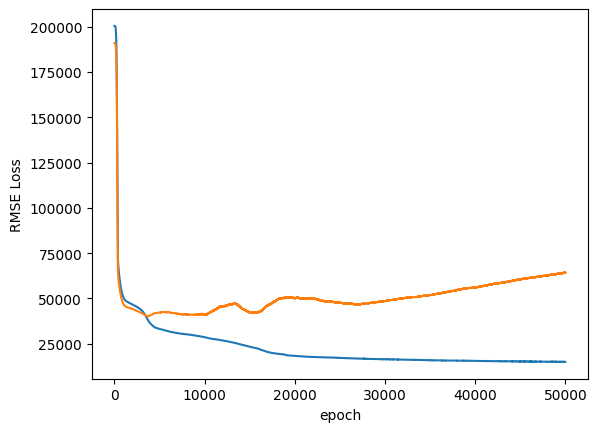

In [306]:
import matplotlib.pyplot as plt
# plot final_loss and final_val_loss

plt.plot(range(epochs), final_losses, label='train loss')
plt.plot(range(epochs), final_val_losses, label='val loss')
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [347]:
df = pd.read_csv('house_price_data/test.csv', usecols=["Id", "MSSubClass", "MSZoning", "LotFrontage", "LotArea",
                                         "Street", "YearBuilt", "LotShape", "1stFlrSF", "2ndFlrSF"]).dropna()
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,YearBuilt,1stFlrSF,2ndFlrSF
0,1461,20,RH,80.0,11622,Pave,Reg,1961,896,0
1,1462,20,RL,81.0,14267,Pave,IR1,1958,1329,0
2,1463,60,RL,74.0,13830,Pave,IR1,1997,928,701
3,1464,60,RL,78.0,9978,Pave,IR1,1998,926,678
4,1465,120,RL,43.0,5005,Pave,IR1,1992,1280,0
...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,1970,546,546
1455,2916,160,RM,21.0,1894,Pave,Reg,1970,546,546
1456,2917,20,RL,160.0,20000,Pave,Reg,1960,1224,0
1457,2918,85,RL,62.0,10441,Pave,Reg,1992,970,0


In [348]:
df['Total Years'] = datetime.datetime.now().year - df['YearBuilt']
df = df.drop(['YearBuilt'], axis=1)

In [349]:
for f in cat_features:
    lbl_encoders[f] = LabelEncoder()
    df[f] = lbl_encoders[f].fit_transform(df[f])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,1stFlrSF,2ndFlrSF,Total Years
0,1461,0,2,80.0,11622,1,3,896,0,63
1,1462,0,3,81.0,14267,1,0,1329,0,66
2,1463,5,3,74.0,13830,1,0,928,701,27
3,1464,5,3,78.0,9978,1,0,926,678,26
4,1465,11,3,43.0,5005,1,0,1280,0,32
...,...,...,...,...,...,...,...,...,...,...
1454,2915,12,4,21.0,1936,1,3,546,546,54
1455,2916,12,4,21.0,1894,1,3,546,546,54
1456,2917,0,3,160.0,20000,1,3,1224,0,64
1457,2918,9,3,62.0,10441,1,3,970,0,32


In [350]:
pred_cate_tensor = torch.tensor(np.stack([df[f] for f in cat_features],1,), dtype=torch.int)
pred_cate_tensor.shape

torch.Size([1229, 4])

In [351]:
pred_cont_tensor = torch.tensor(np.stack([df[f] for f in cont_features],1), dtype=torch.float)
pred_cont_tensor.shape

torch.Size([1229, 5])

In [352]:
pred_price = model(pred_cate_tensor, pred_cont_tensor)
pred_price.shape

torch.Size([1229, 1])

In [353]:
ids = df['Id']
ids.values.shape,pred_price.shape

((1229,), torch.Size([1229, 1]))

In [357]:
result = pd.DataFrame({"Id":ids.values, "SalePrice": pred_price.squeeze().detach().numpy()})
result.to_csv('house_price_predictions.csv',index=False)

In [359]:
model.eval()

FeedForwardModel(
  (embeds): ModuleList(
    (0): Embedding(15, 8)
    (1): Embedding(5, 3)
    (2): Embedding(2, 1)
    (3): Embedding(4, 2)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=19, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=100, out_features=50, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)